In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
import scipy.stats as stats

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.shape

(768, 9)

In [5]:
# pd.read_csv?

In [6]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

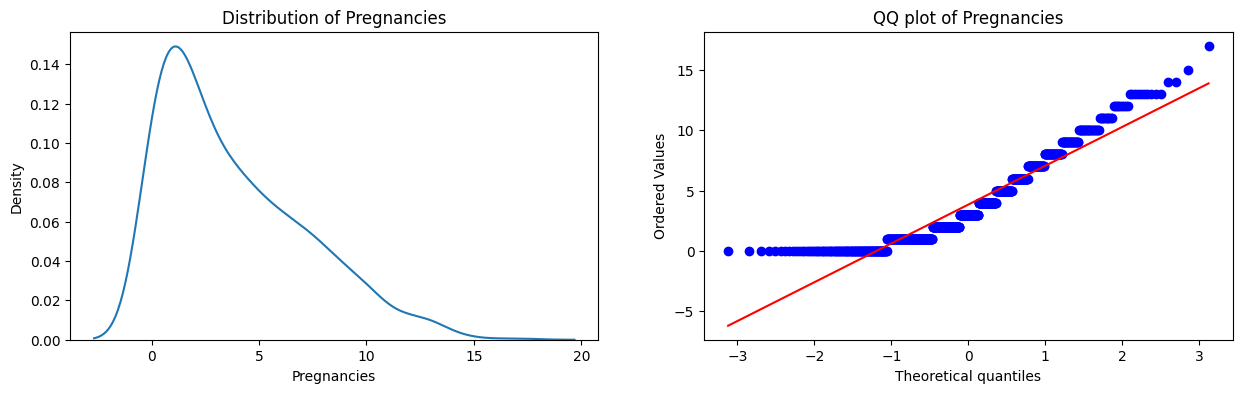

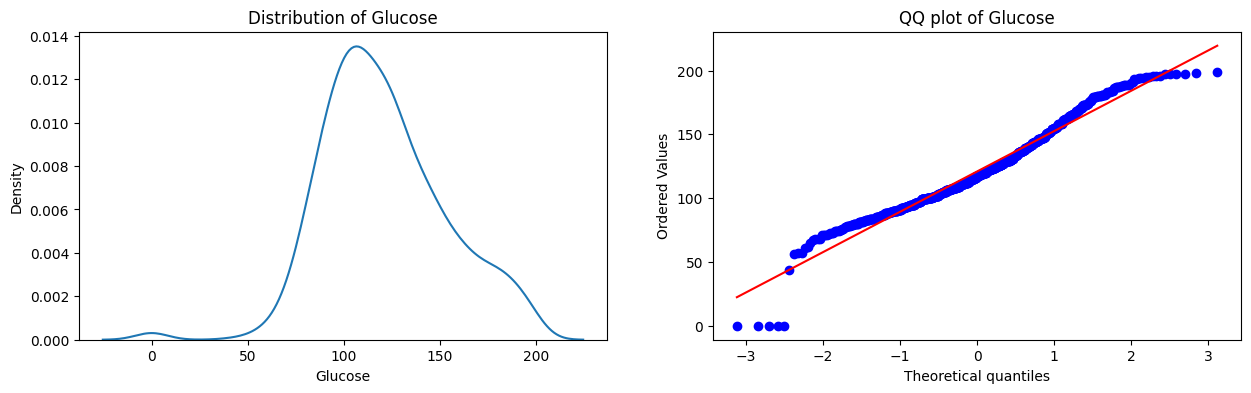

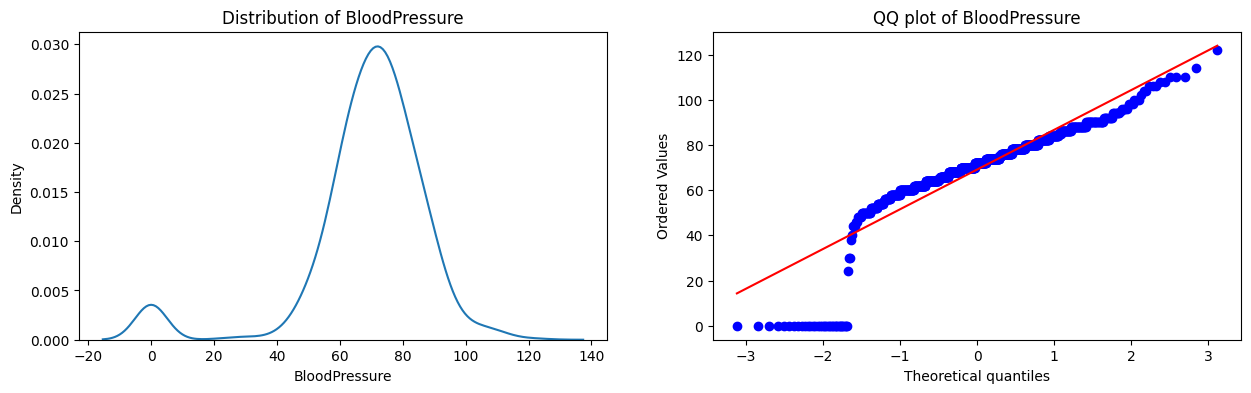

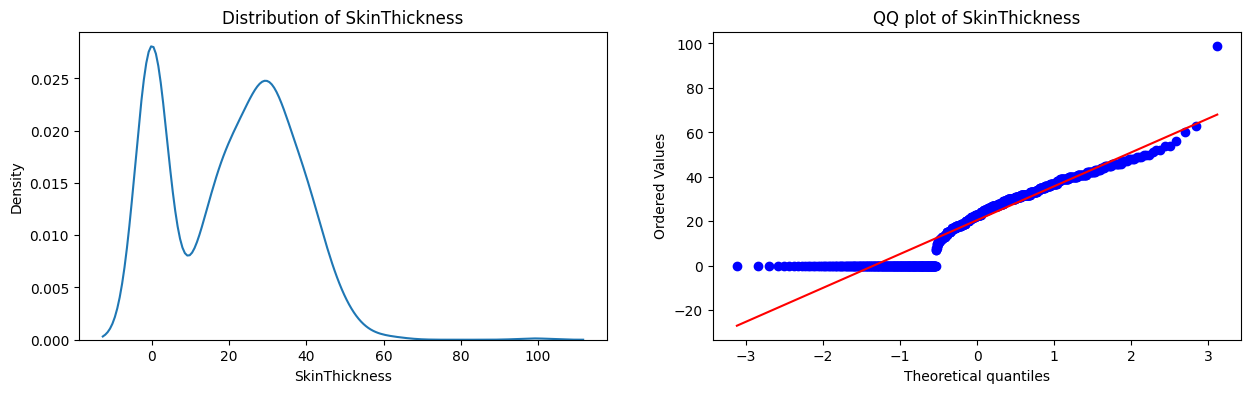

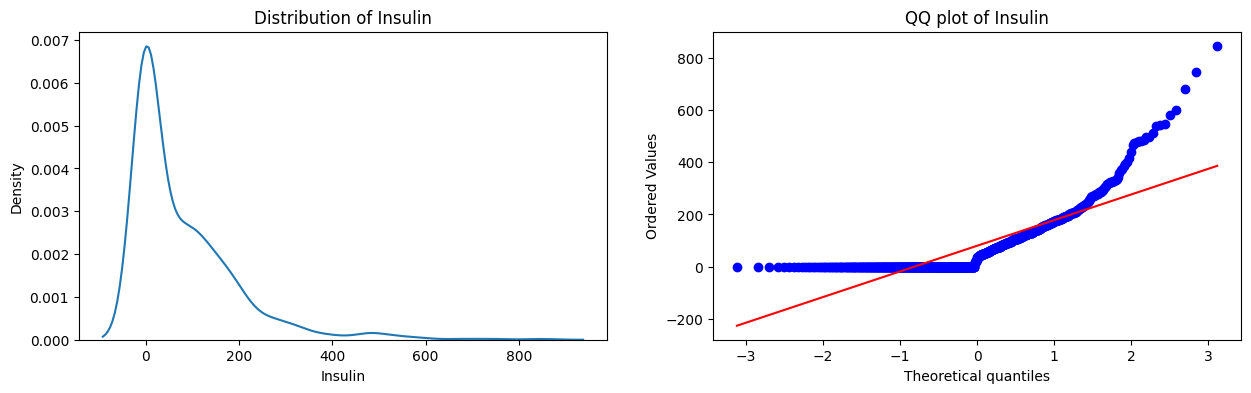

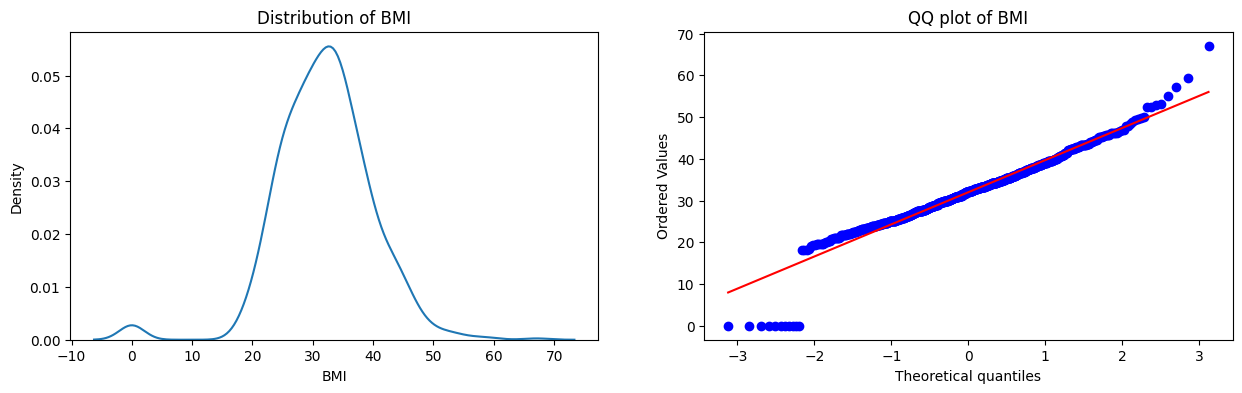

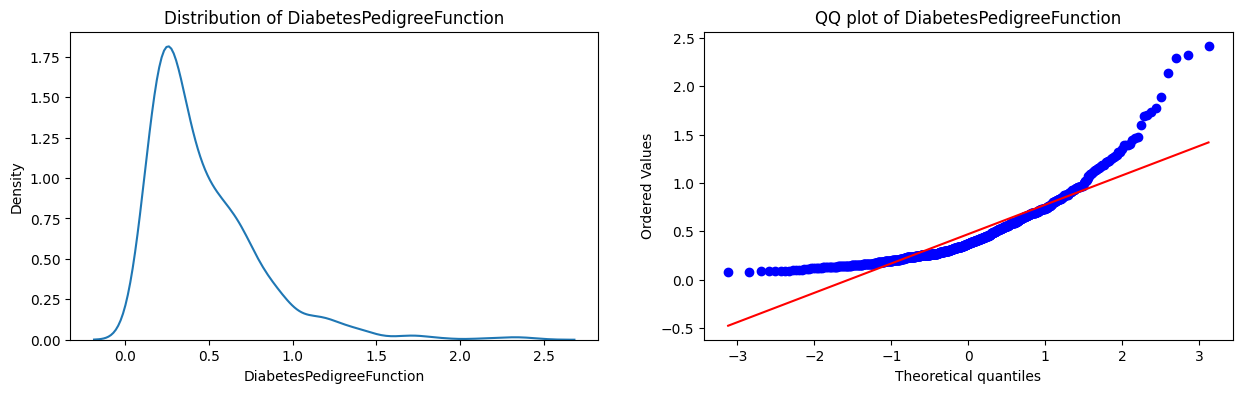

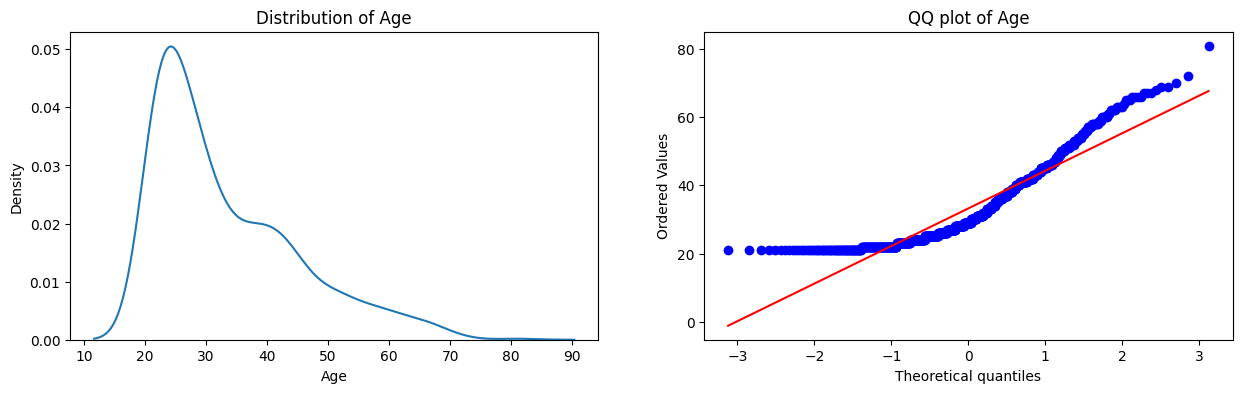

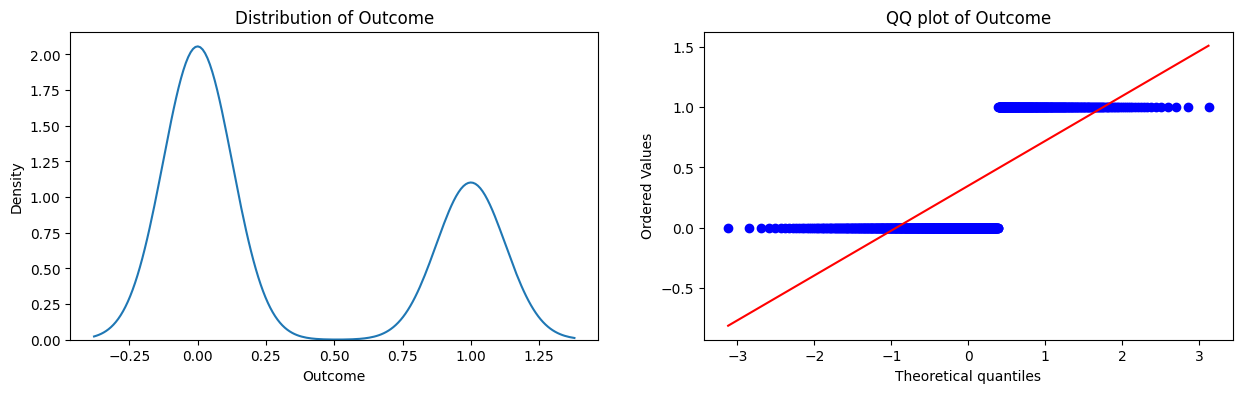

In [11]:
a = df.columns
for i in df.columns:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.kdeplot(df[i])
    plt.title('Distribution of '+str(i))

    plt.subplot(122)
    stats.probplot(df[i],dist='norm',plot=plt)
    plt.title(f'QQ plot of {i}')

In [12]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y
,stratify=y,test_size=0.2,random_state=42)

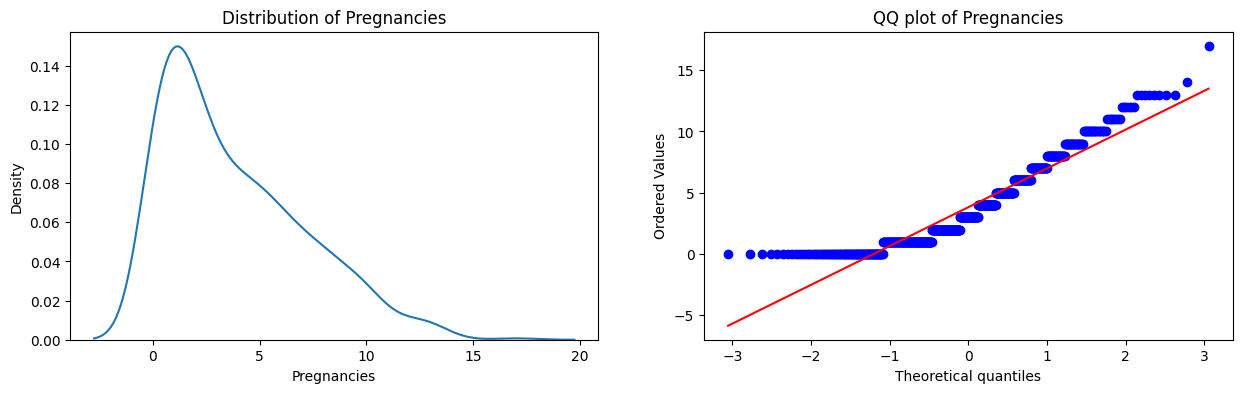

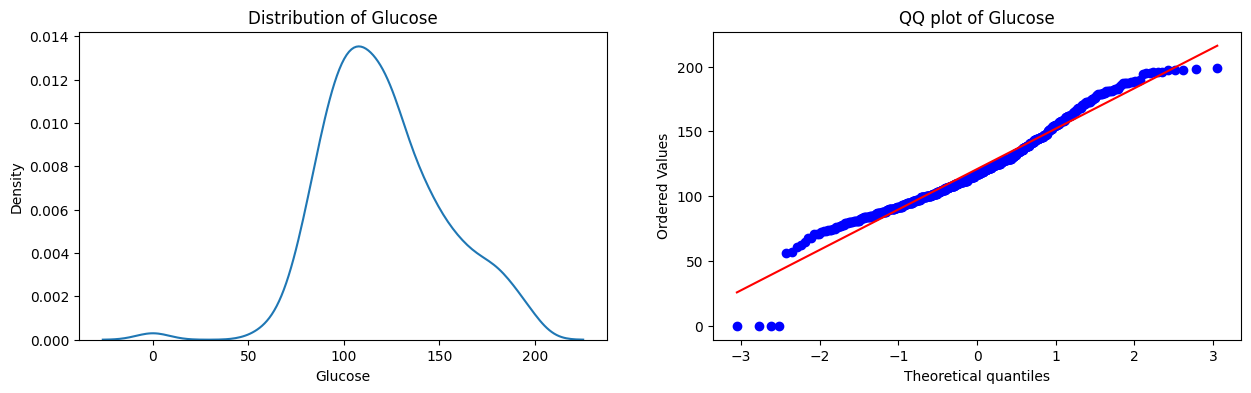

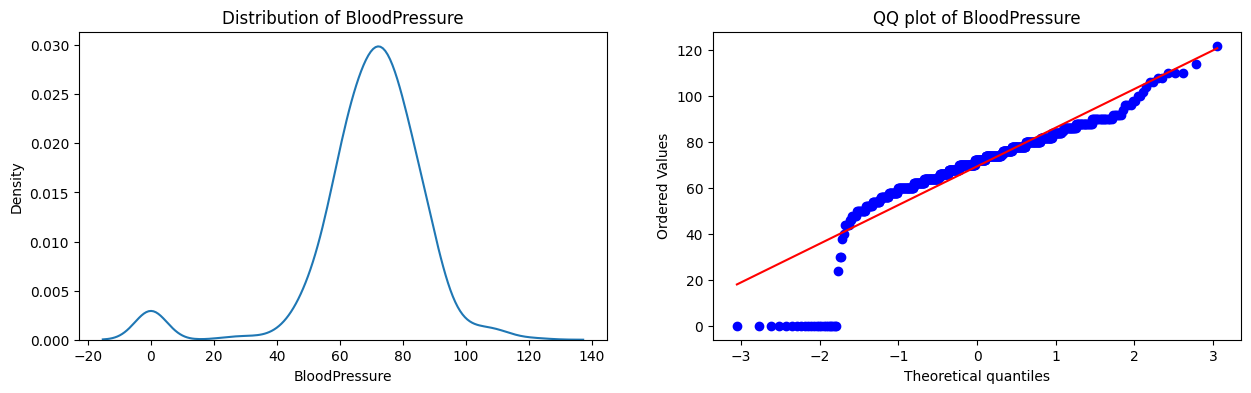

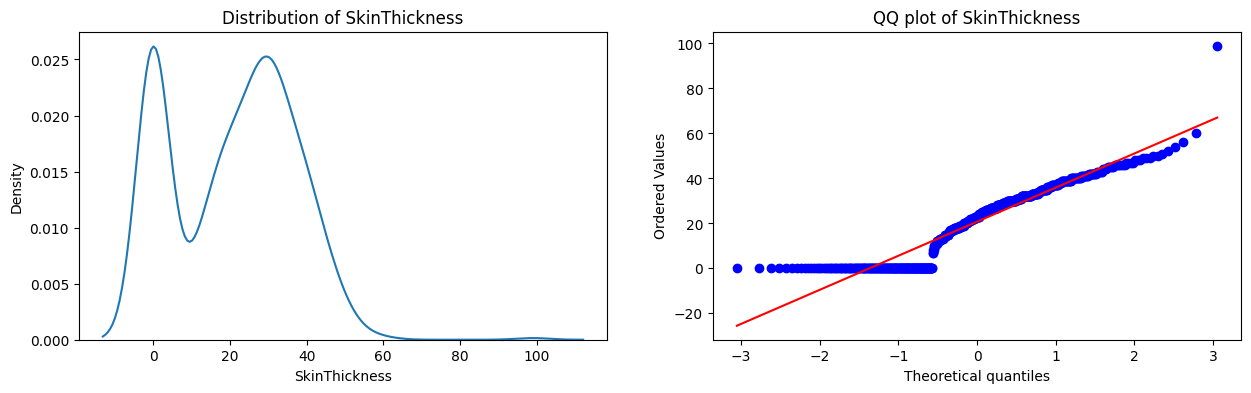

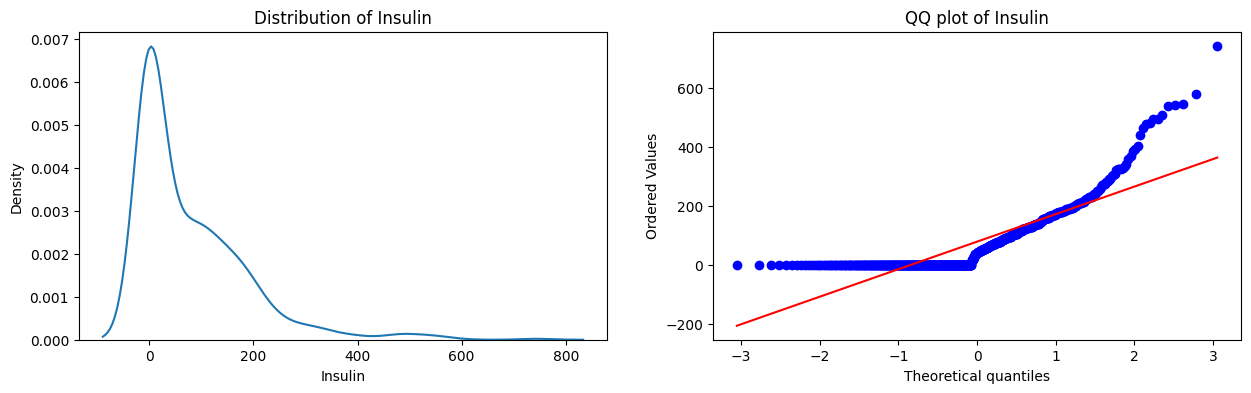

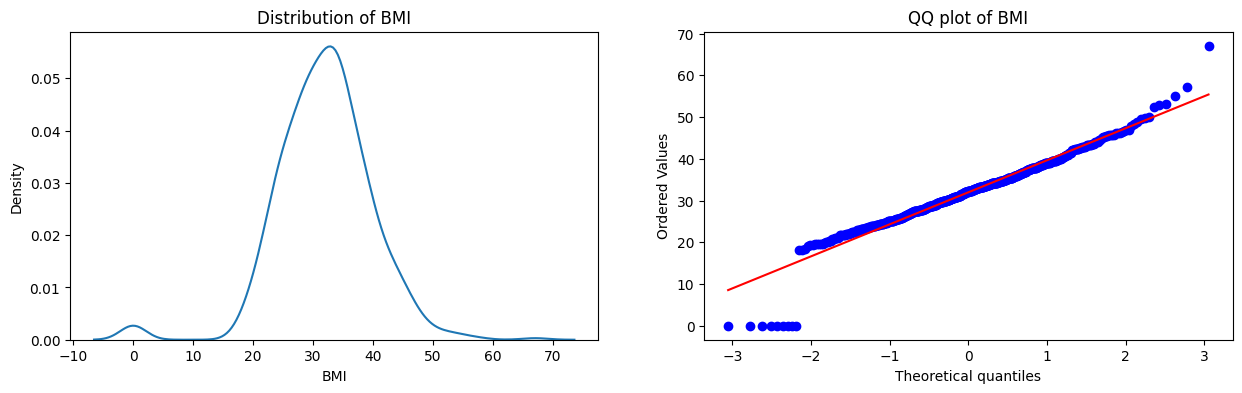

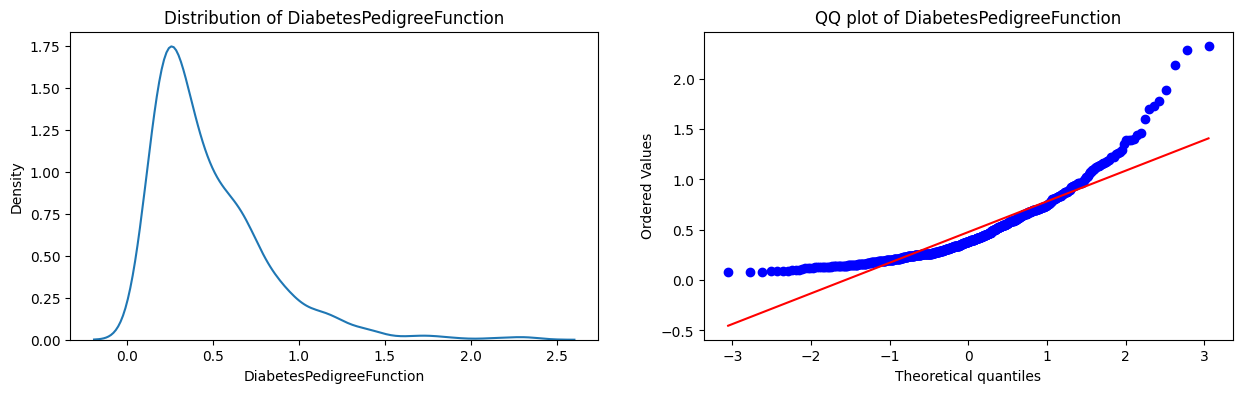

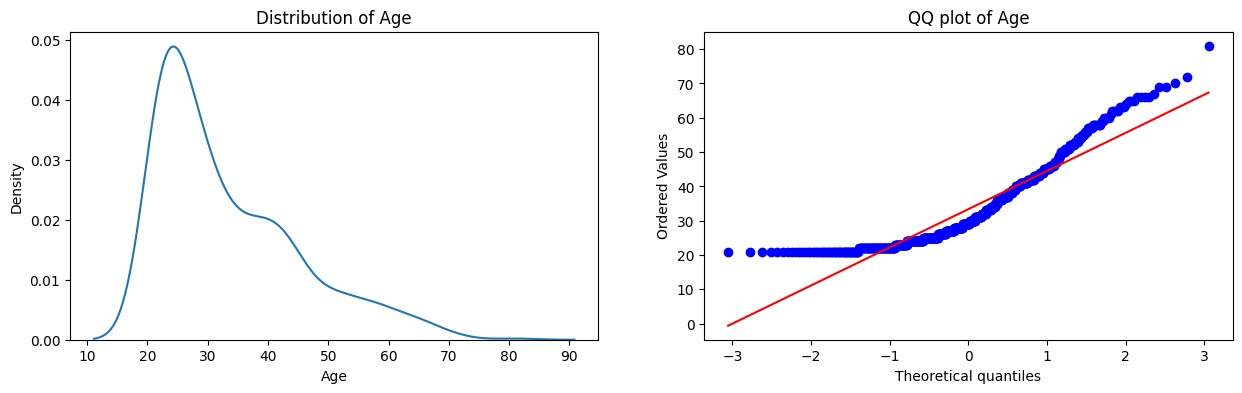

In [15]:
for i in x_train.columns:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.kdeplot(x_train[i])
    plt.title('Distribution of '+str(i))

    plt.subplot(122)
    stats.probplot(x_train[i],dist='norm',plot=plt)
    plt.title(f'QQ plot of {i}')

In [16]:
x_train_tr = pt.fit_transform(x_train)
x_test_tr = pt.transform(x_test)

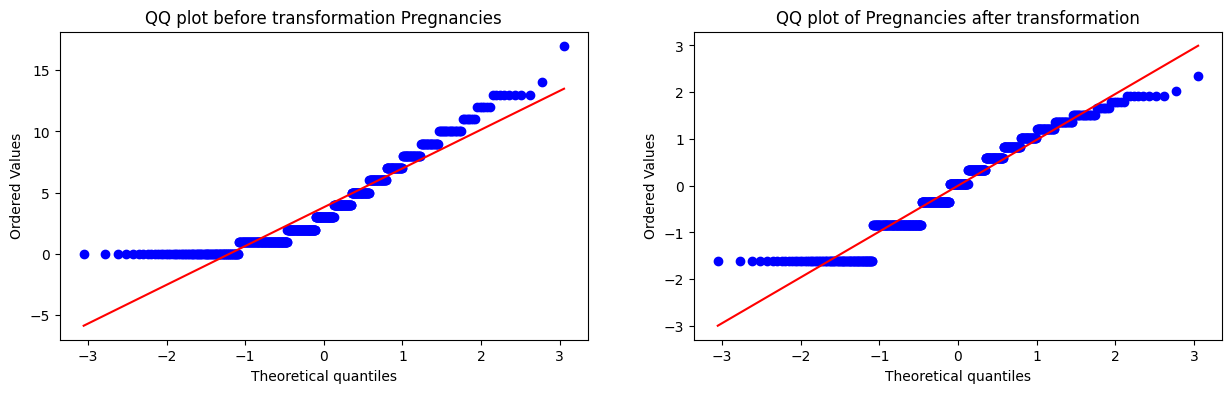

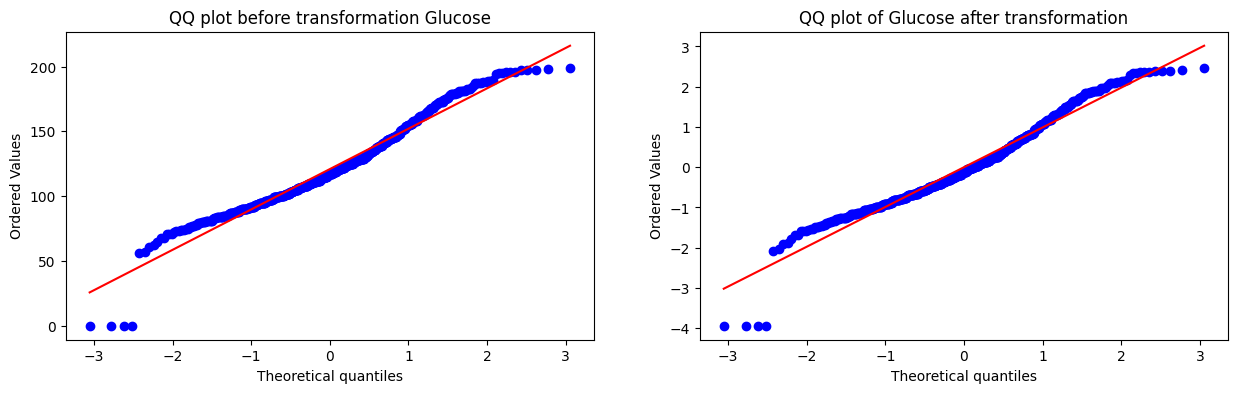

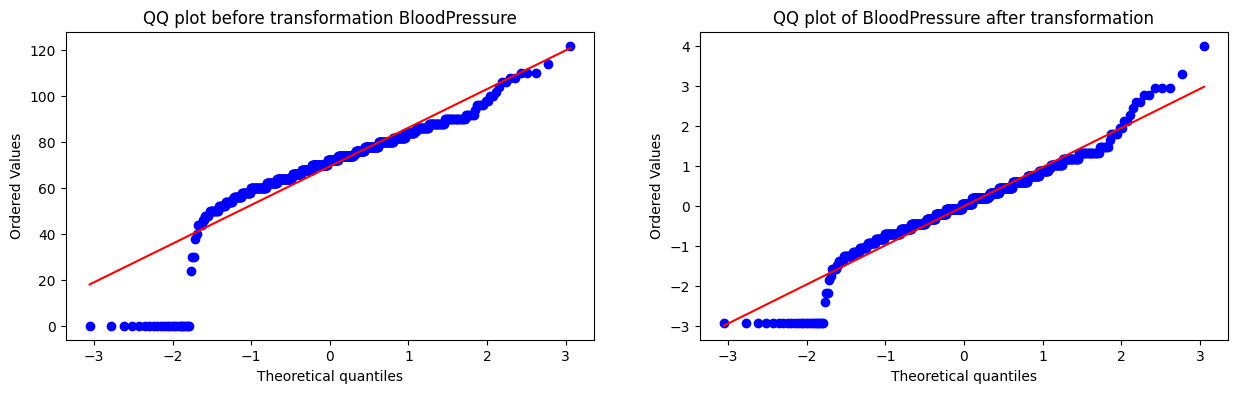

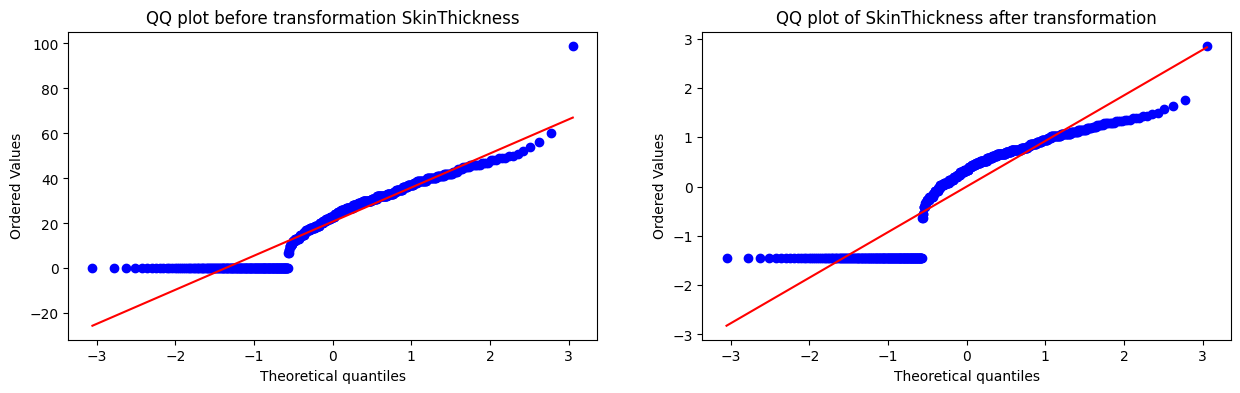

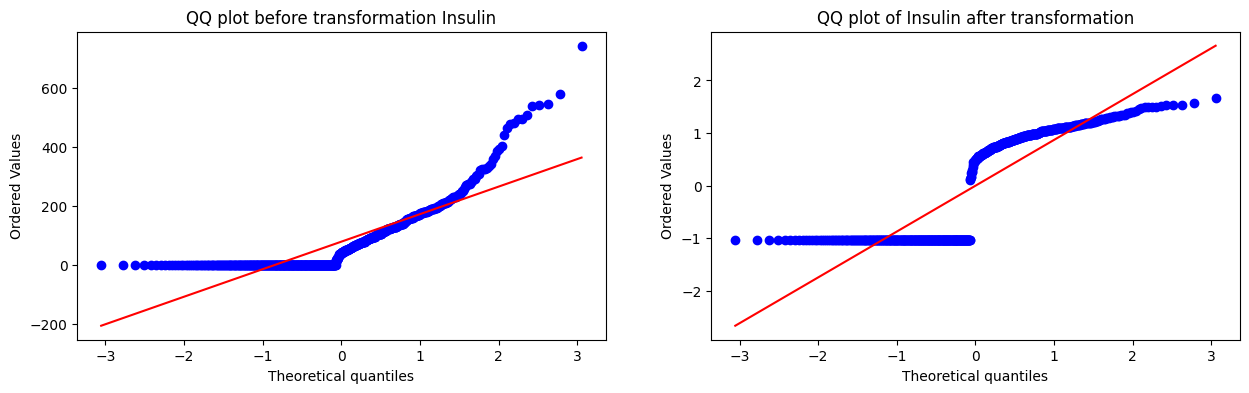

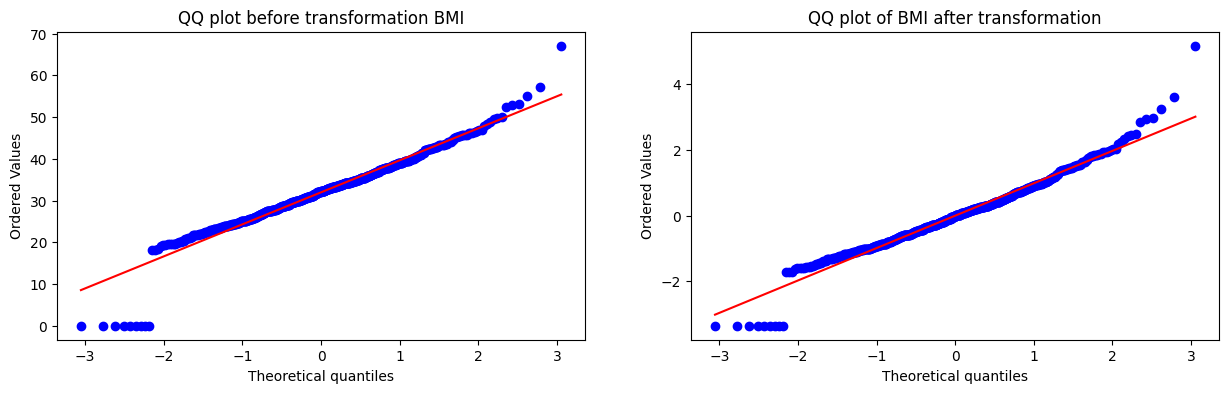

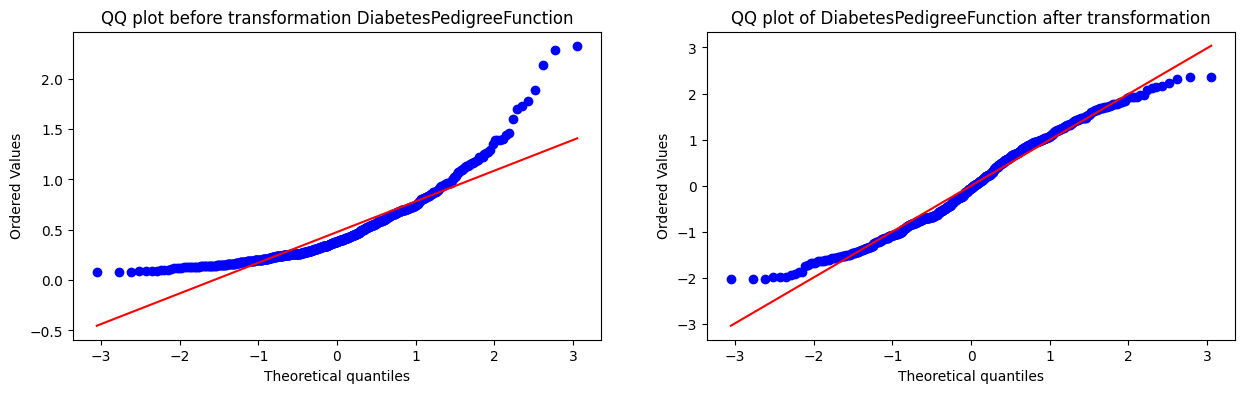

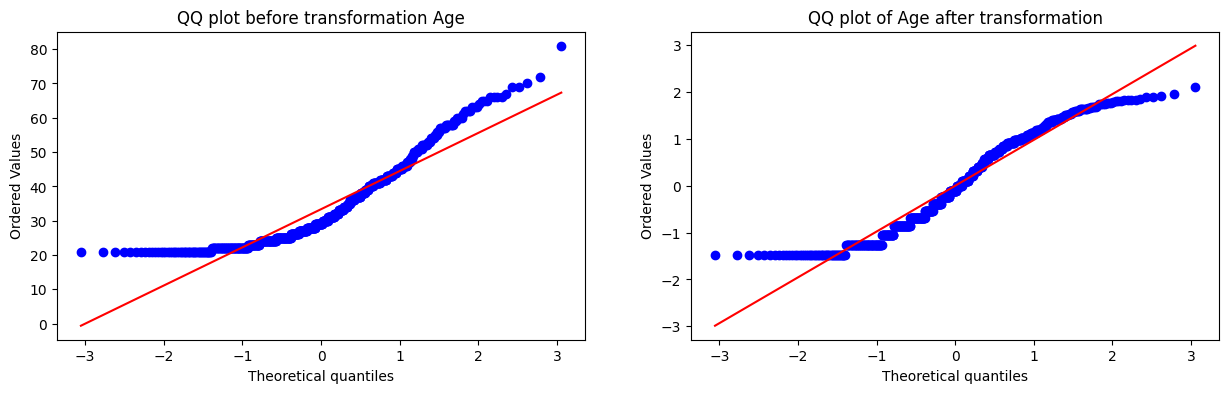

In [17]:
x_train_tr = pd.DataFrame(x_train_tr,columns=x_train.columns)
for i in x_train.columns:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    stats.probplot(x_train[i],dist='norm',plot=plt)
    plt.title(f'QQ plot before transformation {i}')

    plt.subplot(122)
    stats.probplot(x_train_tr[i],dist='norm',plot=plt)
    plt.title(f'QQ plot of {i} after transformation')

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [19]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
s1 = SVC(degree=1)
s2 = SVC(degree=2)
s3 = SVC(degree=3)
vc = VotingClassifier(estimators=[('svc',SVC()),('dt',dt),('rf',rf),('lr',lr)])
vc1 = VotingClassifier(estimators=[('s1',s1),('s2',s2),('s3',s3)])

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
# x = pt.transform(x)

In [22]:
dt.fit(x_train_tr,y_train)
y_pred = dt.predict(x_test_tr)
print('DecisionTreeClassifier',accuracy_score(y_test,y_pred))
print('cross_val_score',np.mean(cross_val_score(dt,x,y,scoring='accuracy',cv=10)))

DecisionTreeClassifier 0.7272727272727273
cross_val_score 0.712218045112782


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
rf.fit(x_train_tr,y_train)
y_pred = rf.predict(x_test_tr)
print('Random Forest',accuracy_score(y_test,y_pred))
print('cross_val_score',np.mean(cross_val_score(rf,x,y,scoring='accuracy',cv=10)))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest 0.7337662337662337
cross_val_score 0.7578434723171565


In [24]:
lr.fit(x_train_tr,y_train)
y_pred = dt.predict(x_test_tr)
print('Logistic Regression',accuracy_score(y_test,y_pred))
print('cross_val_score',np.mean(cross_val_score(lr,x,y,scoring='accuracy',cv=10)))

Logistic Regression 0.7272727272727273


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


cross_val_score 0.7604408749145591


In [25]:
sv = SVC(kernel='linear')
sv.fit(x_train_tr,y_train)
y_pred = sv.predict(x_test_tr)
print('SV',accuracy_score(y_test,y_pred))
print('cross_val_score',np.mean(cross_val_score(sv,x,y,scoring='accuracy',cv=10)))

SV 0.7012987012987013


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


cross_val_score 0.7656527682843473


In [26]:
vc1.fit(x_train_tr,y_train)
y_pred = vc1.predict(x_test_tr)
print('Voting Classifer',accuracy_score(y_test,y_pred))
print('cross_val_score',np.mean(cross_val_score(vc1,x,y,scoring='accuracy',cv=10)))

Voting Classifer 0.7272727272727273


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


cross_val_score 0.7669514695830485


In [27]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
trf = ColumnTransformer(transformers=[('pt',PowerTransformer(),[0,1,2,3,4,5,6,7])],
                        remainder='passthrough')

In [29]:
pipe = Pipeline([('trf',trf),('SVC',SVC(kernel='linear'))])

In [30]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pt', PowerTransformer(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('SVC', SVC(kernel='linear'))])

In [31]:
y_pred = pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.7012987012987013

In [32]:
a = np.array([[2,81,60,22,0,27.7,0.290,25]])
pipe.predict(a)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [33]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.819218,120.908795,69.442997,20.776873,78.666124,31.973290,0.477428,33.366450
std,3.314148,31.561093,18.402581,15.856433,107.736572,7.861364,0.330300,11.833438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,40.500000,32.300000,0.382500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.639250,41.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000


In [34]:
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[81, 19],
       [27, 27]], dtype=int64)

In [35]:
with open('pipe.pkl','wb') as f:
    pickle.dump(pipe,f)
with open('df.pkl','wb') as a:
    pickle.dump(df,a)